# GPU Check

In [ ]:
import GPUtil
GPUs = GPUtil.getGPUs()
for gpu in GPUs:
  print(gpu.name, gpu.memoryTotal)

# Imports

In [ ]:
from search_eval.utils.common_utils import *
from search_eval.eval_no_search_SGLD import Eval_SGLD, SingleImageDataset

from nni.retiarii.evaluator.pytorch import Lightning, Trainer
from nni.retiarii.evaluator.pytorch.lightning import DataLoader

import numpy as np
import torch
torch.cuda.empty_cache()

dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print('CUDA available: {}'.format(torch.cuda.is_available()))

from phantoms.noises import add_gaussian_noise

# Execute

In [ ]:


# INPUTS
total_iterations = 1400
burnin_iter = 700
show_every = 200
lr = 0.14 #  note a smaller learning rate affecs the SGLD, so overfitting happens FASTER at LOWER learning rates (start with 0.01)
resolution = 64
phantom = np.load(f'phantoms/ground_truth/{resolution}/{0}.npy')

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=1, out_channels=1, init_features=64, pretrained=False)
phantom_noisy = add_gaussian_noise(torch.from_numpy(phantom)[None, :], noise_factor=.09).squeeze(1).numpy()

print(f"\n\n----------------------------------")
print(f'Experiment Configuration:')
print(f'\tTotal Iterations: {total_iterations}')
print(f'\tBurnin Iterations: {burnin_iter}')
print(f'\tLearning Rate: {lr}')
print(f'\tImage Resolution: {resolution}')

print(f'\tPlotting every {show_every} iterations')
print(f"----------------------------------\n\n")

# Create the lightning module
module = Eval_SGLD(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                lr=lr, 
                burnin_iter=burnin_iter,
                model=model, # model defaults to U-net 
                show_every=show_every
                )

# Create a PyTorch Lightning trainer
trainer = Trainer(
            max_epochs=total_iterations,
            fast_dev_run=False,
            gpus=1,
            )
            
if not hasattr(trainer, 'optimizer_frequencies'):
    trainer.optimizer_frequencies = []


# Create the lighting object for evaluator
train_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)

lightning = Lightning(lightning_module=module, trainer=trainer, train_dataloaders=train_loader, val_dataloaders=None)
lightning.fit(model)

# silly experiment

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs




----------------------------------
Experiment Configuration:
	Total Iterations: 1800
	Burnin Iterations: 900
	Learning Rate: 0.001
	Image Resolution: 64
	Plotting every 100 iterations
----------------------------------


[2023-09-09 20:15:05] WARNING: Validation dataloaders are missing.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type     | Params
---------------------------------------
0 | model_cls | SillyNet | 37.4 M
1 | criteria  | MSELoss  | 0     
---------------------------------------
37.4 M    Trainable params
0         Non-trainable params
37.4 M    Total params
149.450   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

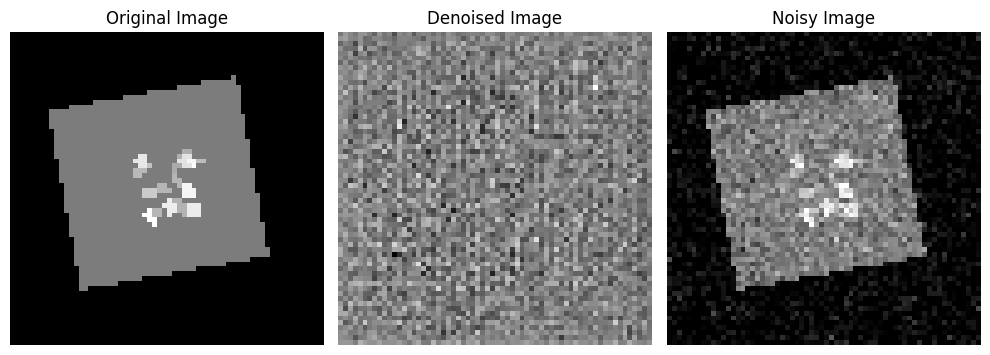

[2023-09-09 20:15:05] Intermediate result: {"iteration": 0, "loss": 0.12047, "psnr_noisy": 9.19114, "psnr_gt": 9.36557}  (Index 67)
[2023-09-09 20:16:00] Intermediate result: {"iteration": 25, "loss": 0.01355, "psnr_noisy": 18.6819, "psnr_gt": 19.75234}  (Index 68)
[2023-09-09 20:16:55] Intermediate result: {"iteration": 50, "loss": 0.01136, "psnr_noisy": 19.44664, "psnr_gt": 20.81559}  (Index 69)
[2023-09-09 20:17:49] Intermediate result: {"iteration": 75, "loss": 0.00935, "psnr_noisy": 20.2906, "psnr_gt": 20.71037}  (Index 70)


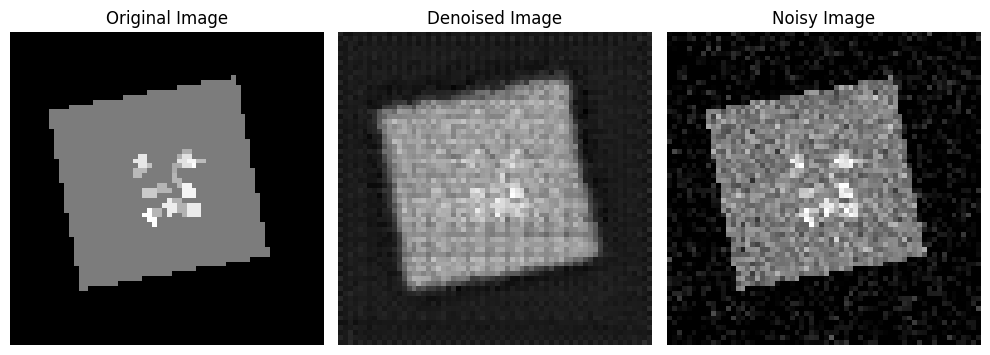

[2023-09-09 20:18:44] Intermediate result: {"iteration": 100, "loss": 0.0069, "psnr_noisy": 21.61353, "psnr_gt": 22.95665}  (Index 71)
[2023-09-09 20:19:38] Intermediate result: {"iteration": 125, "loss": 0.00566, "psnr_noisy": 22.474, "psnr_gt": 22.47264}  (Index 72)
[2023-09-09 20:20:32] Intermediate result: {"iteration": 150, "loss": 0.00334, "psnr_noisy": 24.76168, "psnr_gt": 22.41541}  (Index 73)
[2023-09-09 20:21:26] Intermediate result: {"iteration": 175, "loss": 0.00382, "psnr_noisy": 24.17507, "psnr_gt": 21.28174}  (Index 74)


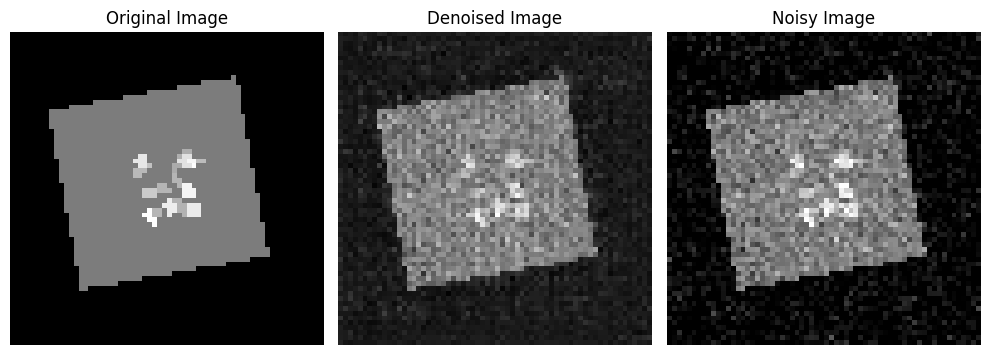

[2023-09-09 20:22:20] Intermediate result: {"iteration": 200, "loss": 0.00237, "psnr_noisy": 26.25733, "psnr_gt": 22.75703}  (Index 75)
[2023-09-09 20:23:14] Intermediate result: {"iteration": 225, "loss": 0.00242, "psnr_noisy": 26.15314, "psnr_gt": 22.46638}  (Index 76)
[2023-09-09 20:24:09] Intermediate result: {"iteration": 250, "loss": 0.00265, "psnr_noisy": 25.76603, "psnr_gt": 21.37247}  (Index 77)
[2023-09-09 20:25:03] Intermediate result: {"iteration": 275, "loss": 0.00245, "psnr_noisy": 26.11434, "psnr_gt": 22.98475}  (Index 78)


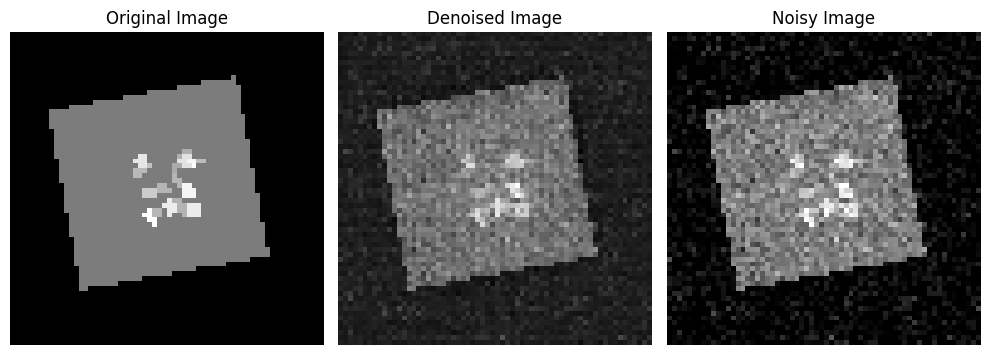

[2023-09-09 20:25:57] Intermediate result: {"iteration": 300, "loss": 0.0027, "psnr_noisy": 25.67991, "psnr_gt": 20.40707}  (Index 79)
[2023-09-09 20:26:50] Intermediate result: {"iteration": 325, "loss": 0.00185, "psnr_noisy": 27.32377, "psnr_gt": 22.48814}  (Index 80)
[2023-09-09 20:27:44] Intermediate result: {"iteration": 350, "loss": 0.00249, "psnr_noisy": 26.03591, "psnr_gt": 21.27571}  (Index 81)
[2023-09-09 20:28:37] Intermediate result: {"iteration": 375, "loss": 0.00293, "psnr_noisy": 25.33834, "psnr_gt": 22.16372}  (Index 82)


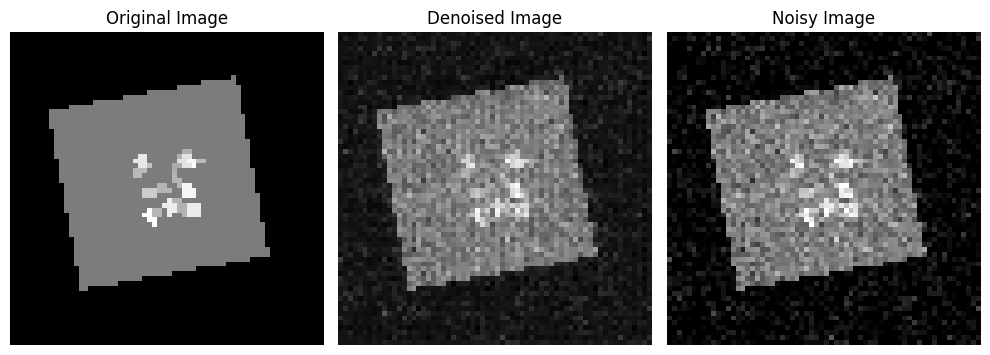

[2023-09-09 20:29:32] Intermediate result: {"iteration": 400, "loss": 0.00142, "psnr_noisy": 28.46799, "psnr_gt": 22.33438}  (Index 83)
[2023-09-09 20:30:26] Intermediate result: {"iteration": 425, "loss": 0.00204, "psnr_noisy": 26.89426, "psnr_gt": 20.85413}  (Index 84)
[2023-09-09 20:31:20] Intermediate result: {"iteration": 450, "loss": 0.0023, "psnr_noisy": 26.38555, "psnr_gt": 21.05805}  (Index 85)
[2023-09-09 20:32:14] Intermediate result: {"iteration": 475, "loss": 0.00113, "psnr_noisy": 29.4789, "psnr_gt": 22.24512}  (Index 86)


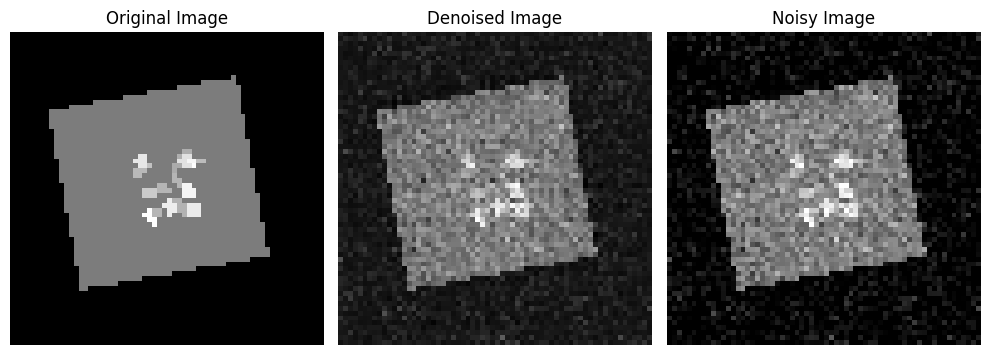

[2023-09-09 20:33:08] Intermediate result: {"iteration": 500, "loss": 0.00121, "psnr_noisy": 29.15782, "psnr_gt": 22.42517}  (Index 87)
[2023-09-09 20:34:02] Intermediate result: {"iteration": 525, "loss": 0.0011, "psnr_noisy": 29.58805, "psnr_gt": 21.99587}  (Index 88)
[2023-09-09 20:34:56] Intermediate result: {"iteration": 550, "loss": 0.00097, "psnr_noisy": 30.12535, "psnr_gt": 21.93485}  (Index 89)
[2023-09-09 20:35:49] Intermediate result: {"iteration": 575, "loss": 0.00265, "psnr_noisy": 25.77357, "psnr_gt": 21.19023}  (Index 90)


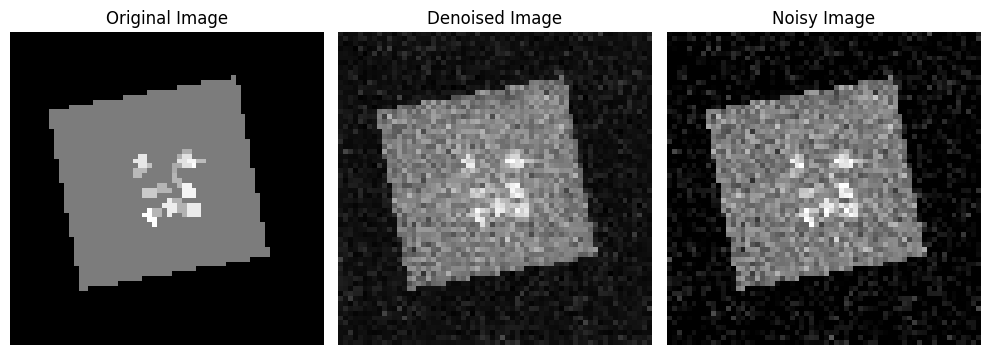

[2023-09-09 20:36:43] Intermediate result: {"iteration": 600, "loss": 0.00166, "psnr_noisy": 27.8001, "psnr_gt": 22.45949}  (Index 91)
[2023-09-09 20:37:36] Intermediate result: {"iteration": 625, "loss": 0.00224, "psnr_noisy": 26.50119, "psnr_gt": 20.93116}  (Index 92)
[2023-09-09 20:38:30] Intermediate result: {"iteration": 650, "loss": 0.00151, "psnr_noisy": 28.22406, "psnr_gt": 21.93406}  (Index 93)
[2023-09-09 20:39:23] Intermediate result: {"iteration": 675, "loss": 0.00149, "psnr_noisy": 28.26356, "psnr_gt": 21.97886}  (Index 94)


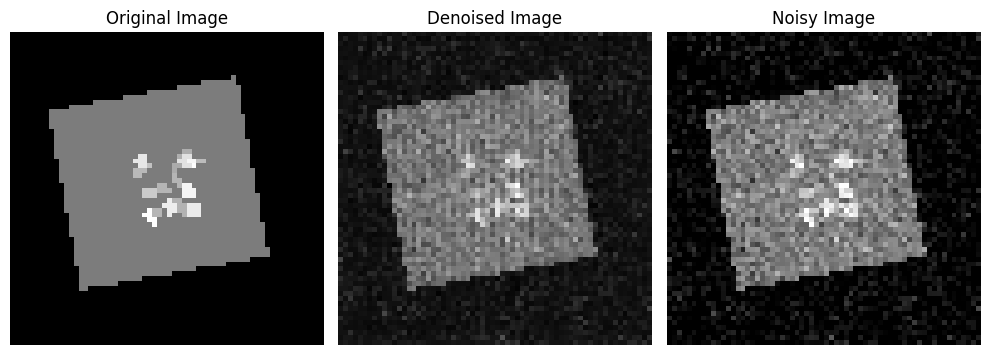

[2023-09-09 20:40:16] Intermediate result: {"iteration": 700, "loss": 0.00152, "psnr_noisy": 28.18851, "psnr_gt": 22.73671}  (Index 95)
[2023-09-09 20:41:10] Intermediate result: {"iteration": 725, "loss": 0.00059, "psnr_noisy": 32.29567, "psnr_gt": 22.41742}  (Index 96)
[2023-09-09 20:42:03] Intermediate result: {"iteration": 750, "loss": 0.0013, "psnr_noisy": 28.84755, "psnr_gt": 22.65713}  (Index 97)
[2023-09-09 20:42:56] Intermediate result: {"iteration": 775, "loss": 0.00182, "psnr_noisy": 27.40096, "psnr_gt": 21.59257}  (Index 98)


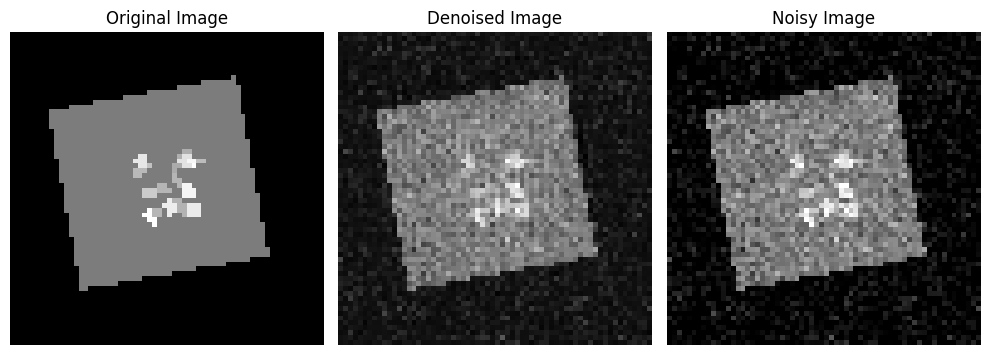

[2023-09-09 20:43:50] Intermediate result: {"iteration": 800, "loss": 0.001, "psnr_noisy": 29.98614, "psnr_gt": 22.30708}  (Index 99)
[2023-09-09 20:44:43] Intermediate result: {"iteration": 825, "loss": 0.00168, "psnr_noisy": 27.75484, "psnr_gt": 21.6521}  (Index 100)
[2023-09-09 20:45:36] Intermediate result: {"iteration": 850, "loss": 0.00233, "psnr_noisy": 26.33276, "psnr_gt": 21.21226}  (Index 101)
[2023-09-09 20:46:29] Intermediate result: {"iteration": 875, "loss": 0.00132, "psnr_noisy": 28.80929, "psnr_gt": 20.99835}  (Index 102)


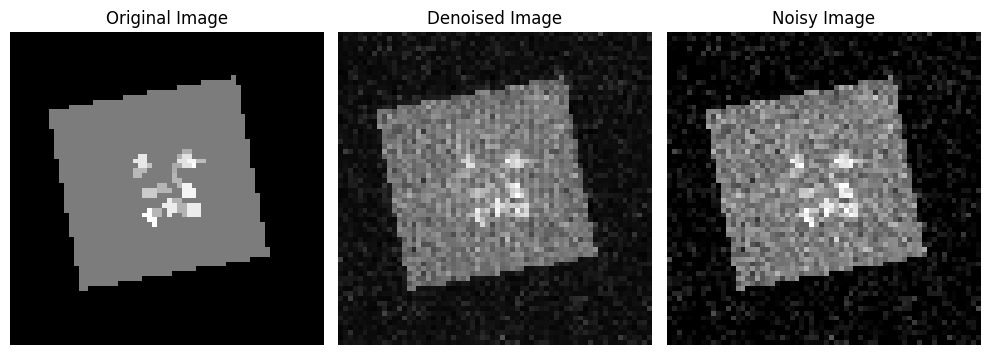

[2023-09-09 20:47:23] Intermediate result: {"iteration": 900, "loss": 0.00238, "psnr_noisy": 26.24078, "psnr_gt": 21.22473}  (Index 103)
[2023-09-09 20:48:16] Intermediate result: {"iteration": 925, "loss": 0.00184, "sample count": 25, "psnr_sgld_last": 22.83551, "psnr_gt": 21.65421}  (Index 104)
[2023-09-09 20:49:10] Intermediate result: {"iteration": 950, "loss": 0.00067, "sample count": 50, "psnr_sgld_last": 22.84104, "psnr_gt": 22.46143}  (Index 105)
[2023-09-09 20:50:03] Intermediate result: {"iteration": 975, "loss": 0.00113, "sample count": 75, "psnr_sgld_last": 22.83129, "psnr_gt": 21.81495}  (Index 106)
MCMC sample count: 1.0


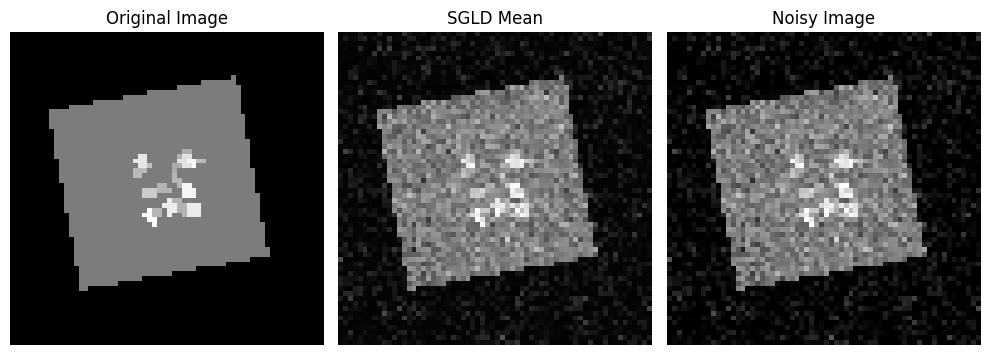

[2023-09-09 20:50:57] Intermediate result: {"iteration": 1000, "loss": 0.00081, "sample count": 100, "psnr_sgld_last": 22.81425, "psnr_gt": 22.62833}  (Index 107)
[2023-09-09 20:51:50] Intermediate result: {"iteration": 1025, "loss": 0.00073, "sample count": 125, "psnr_sgld_last": 22.79402, "psnr_gt": 21.58802}  (Index 108)
[2023-09-09 20:52:44] Intermediate result: {"iteration": 1050, "loss": 0.00102, "sample count": 150, "psnr_sgld_last": 22.78047, "psnr_gt": 21.45235}  (Index 109)
[2023-09-09 20:53:38] Intermediate result: {"iteration": 1075, "loss": 0.00104, "sample count": 175, "psnr_sgld_last": 22.76791, "psnr_gt": 21.44857}  (Index 110)


In [4]:


# INPUTS
total_iterations = 1200
burnin_iter = 700
show_every = 100
report_every = 10
lr = 0.1 #  note a smaller learning rate affecs the SGLD, so overfitting happens FASTER at LOWER learning rates (start with 0.01)
resolution = 64
phantom = np.load(f'phantoms/ground_truth/{resolution}/{0}.npy')

phantom_noisy = add_gaussian_noise(torch.from_numpy(phantom)[None, :], noise_factor=.09).squeeze(1).numpy()

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=1, out_channels=1, init_features=64, pretrained=False)

# from search_space.silly_space import SillyNet
# model = SillyNet(1,1,4)


print(f"\n\n----------------------------------")
print(f'Experiment Configuration:')
print(f'\tTotal Iterations: {total_iterations}')
print(f'\tBurnin Iterations: {burnin_iter}')
print(f'\tLearning Rate: {lr}')
print(f'\tImage Resolution: {resolution}')

print(f'\tPlotting every {show_every} iterations')
print(f"----------------------------------\n\n")

# Create the lightning module
module = Eval_SGLD(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                lr=lr, 
                burnin_iter=burnin_iter,
                model=model, # model defaults to U-net 
                show_every=show_every,
                report_every=report_every
                )

# Create a PyTorch Lightning trainer
trainer = Trainer(
            max_epochs=total_iterations,
            fast_dev_run=False,
            gpus=1,
            )
            
if not hasattr(trainer, 'optimizer_frequencies'):
    trainer.optimizer_frequencies = []


# Create the lighting object for evaluator
train_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)

lightning = Lightning(lightning_module=module, trainer=trainer, train_dataloaders=train_loader, val_dataloaders=None)
lightning.fit(model)

In [ ]:
import torch

# create random tensor 1x1x64x64
x = torch.randn(1, 1, 64, 64)
out = model(x)
print(out.shape)

# DIP

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc1 = nn.Conv2d(in_planes, in_planes // ratio, kernel_size=1, bias=False)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Conv2d(in_planes // ratio, in_planes, kernel_size=1, bias=False)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
        max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        out = avg_out + max_out
        return self.sigmoid(out)

class DeepImagePrior(nn.Module):
    def __init__(self, in_channels, out_channels, depth):
        super(DeepImagePrior, self).__init__()

        mid_depth = depth // 2

        # Input layer
        self.in_layer = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.convs_enc = nn.ModuleList()
        self.cas_enc = nn.ModuleList()

        # Encoding
        for i in range(mid_depth):
            self.convs_enc.append(nn.Conv2d(2**i * 64, 2**(i+1) * 64, kernel_size=3, padding=1))
            self.cas_enc.append(ChannelAttention(2**(i+1) * 64))

        self.convs_dec = nn.ModuleList()
        self.cas_dec = nn.ModuleList()

        # Decoding
        for i in range(mid_depth, depth - 1):
            self.convs_dec.append(nn.Conv2d(2**(depth-i-1) * 64, 2**(depth-i-2) * 64, kernel_size=3, padding=1))
            self.cas_dec.append(ChannelAttention(2**(depth-i-2) * 64))

        # Output layer
        self.out_layer = nn.Conv2d(64, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.in_layer(x))
        
        for conv, ca in zip(self.convs_enc, self.cas_enc):
            x = F.relu(conv(x))
            x = ca(x) * x

        for conv, ca in zip(self.convs_dec, self.cas_dec):
            x = F.relu(conv(x))
            x = ca(x) * x

        x = self.out_layer(x)
        return x